## 1. Лауреаты Нобелевской премии
Нобелевская премия, пожалуй, самая известная научная награда в мире. Каждый год она вручается ученым по направлениям "Химия", "Физика", "Физиология или медицина", "Литература", "Экономика" и "Премия мира". Первая Нобелевская премия была вручена в 1901 году, в то время она была очень европоцентристской и ориентированной на мужчин, но в настоящее время её вручение не основано на подобных предубеждениях. Эту гипотезу стоит проверить.  
Нобелевский фонд сделал доступным набор данных всех лауреатов премии с момента ее начала, 1901 года, до 2016 года.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('nobel.csv')
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. Кто же получает Нобелевскую премию?

Действительно, все победители в 1901 году были мужчинами из Европы. 
Необходимо выяснить, какой пол и какая страна наиболее часто представлены во всём наборе данных с 1901 по 2016 год.

In [14]:
#Общее количество премий
display(len(nobel))
# Количество премий, вручённых мужчинам и женщинам
display(nobel.sex.value_counts())
# 10 национальностей, представители которых получили наибольшее количество премий
nobel.birth_country.value_counts().sort_values(ascending=False).head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. Доминирование США

Возможно, это и не так удивительно: США преобладает по количеству Нобелевских лауреатов. Но в 1901 году все победители были европейцами. Выясним, когда США начали лидировать среди Нобелевских лауреатов.

In [15]:
# Расчёт доли лауреатов, рождённых в США, за каждое десятилетие
nobel['usa_winner'] = nobel.birth_country == "United States of America"
nobel['decade'] = (np.floor(nobel.year / 10) * 10).astype(int)
prop_usa = nobel.groupby('decade', as_index=False)['usa_winner'].mean()
prop_usa['usa_winner'] = prop_usa['usa_winner']*100
display(prop_usa)

,decade,usa_winner
0,1900,1.754386
1,1910,7.500000
2,1920,7.407407
3,1930,25.000000
4,1940,30.232558
5,1950,29.166667
6,1960,26.582278
7,1970,31.730769
8,1980,31.958763
9,1990,40.384615


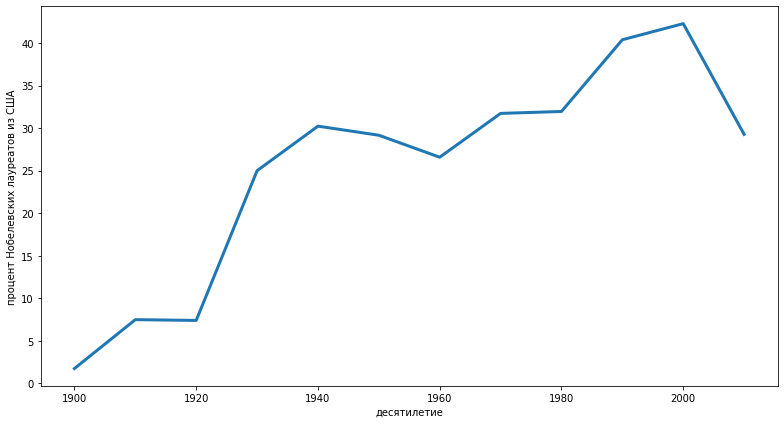

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
# График зависимости доли лауреатов, рождённых в США, от десятилетия
ax = sns.lineplot(data = prop_usa, x = 'decade', y = 'usa_winner', linewidth=3)\
.set(xlabel = 'десятилетие', ylabel = 'процент Нобелевских лауреатов из США')
plt.tight_layout()

## 4. Какой пол типичного лауреата Нобелевской премии?

Таким образом, США стали лидером среди лауреатов Нобелевской премии впервые в 1930-х годах и с тех пор удерживают лидирующие позиции. Однако существует некоторый дисбаланс между количеством мужчин и женщин-призеров, но насколько значителен этот дисбаланс? И лучше ли это или хуже в рамках конкретных призовых категорий, таких как физика, медицина, литература и т. д.?

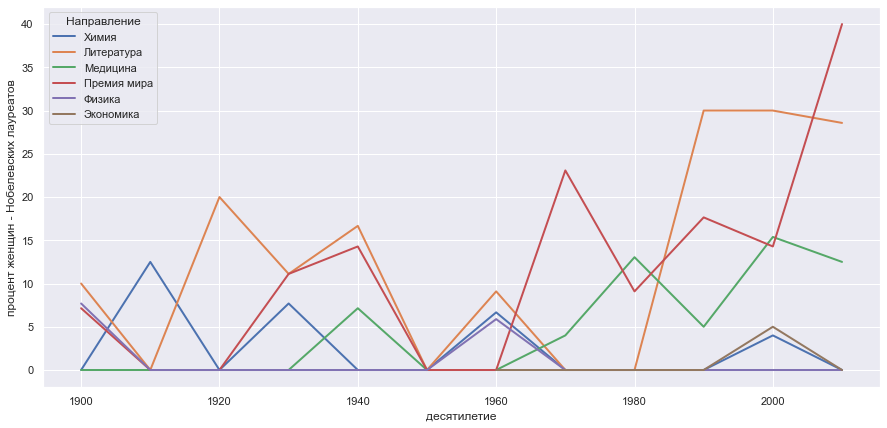

In [50]:
# Расчет доли женщин-лауреатов за каждое десятилетие
nobel['female_winner'] = nobel.sex == 'Female'
prop_female = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()
prop_female['female_winner'] = prop_female['female_winner']*100

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax = sns.lineplot(data=prop_female, x='decade', y='female_winner', hue='category', linewidth = 2)\
.set(xlabel = 'десятилетие', ylabel = 'процент женщин - Нобелевских лауреатов')

plt.legend(title = 'Направление', loc = 'upper left', labels = ['Химия', 'Литература', 'Медицина', 'Премия мира', 'Физика', 'Экономика'])
plt.show(ax)

## 5. Первая женщина, получившая Нобелевскую премию

Предыдущий график показывает некоторые интересные тенденции и закономерности. В целом дисбаланс довольно велик, причем наибольший дисбаланс наблюдается в физике, экономике и химии. Премии по медицине и литературе более сбалансированы. Резкая тенденция роста наблюдается у Премии мира в 2010-е годы и у литературной премии в 1980-е.

In [53]:
# Находим первую женщину-лауреата
women = nobel[nobel.sex == 'Female']
women.sort_values('year').head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,usa_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True


## 6. Повтор лауреатов

Для большинства ученых/писателей/активистов Нобелевская премия была бы венцом долгой карьеры. Но существовали неоднократные лауреаты. Найдём их в датафрейме.

In [55]:
nobel.groupby('full_name').filter(lambda x: len(x) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,usa_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1950,True,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1950,True,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1950,False,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960,True,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,False,False


## 7. Возраст лауреатов

Список повторных победителей содержит несколько прославленных имен. Мы снова встречаемся с Марией Кюри, которая получила премию по физике за открытие излучения и по химии за выделение радия и полония. Джон Бардин получил её дважды по физике за транзисторы и сверхпроводимость, Фредерик Сэнгер получил её дважды по химии, а Линус Карл Полинг получил премию сначала по химии, а затем в премию мира за свою работу по содействию ядерному разоружению. Мы также узнаем, что организации также получают приз, поскольку и Красный Крест, и УВКБ ООН получили его дважды.  
Исследуем возраст Нобелевских лауреатов.

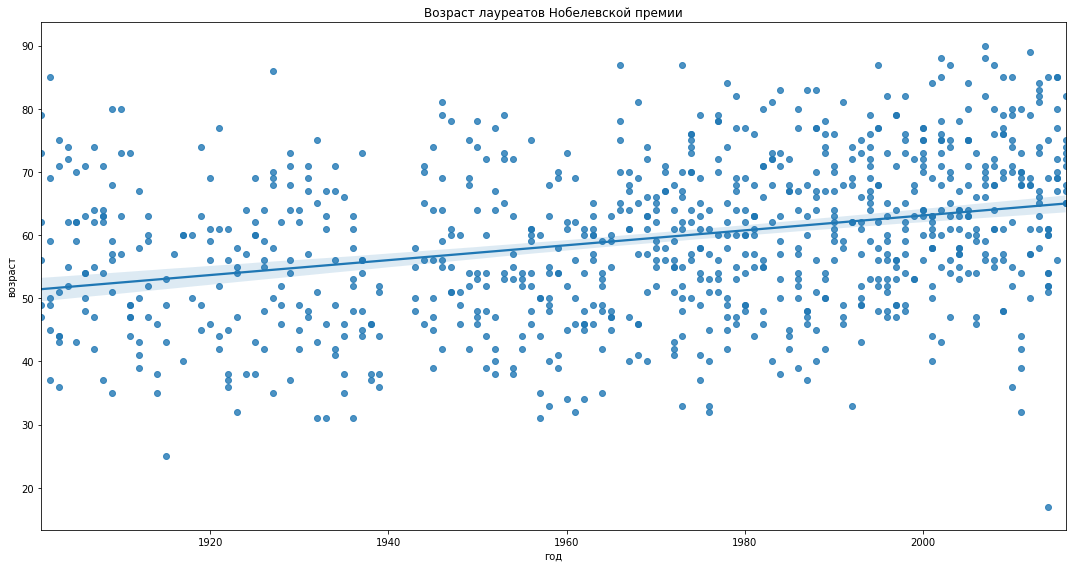

In [30]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# График возраста лауреатов
fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(x = 'year', y = 'age', data = nobel, ax = ax)
ax.set(title = 'Возраст лауреатов Нобелевской премии', xlabel = 'год', ylabel = 'возраст')
plt.tight_layout()

## 8. Возрастные различия между призовыми категориями

График выше показывает многое. Раньше средний возраст лауреатов равнялся примерно 55 годам, но сейчас этот показатель ближе к 65. Существует большой разброс в возрасте лауреатов, и хотя большинству из них уже за 50, некоторые очень молоды.  
Плотность точек в наши дни намного выше, чем в начале 1900-х годов - в наши дни вручается гораздо больше премий. Во время Второй мировой войны (1939-1945 гг.) произошел перерыв в присуждении премий.  
Давайте рассмотрим возрастные тенденции в различных призовых категориях.

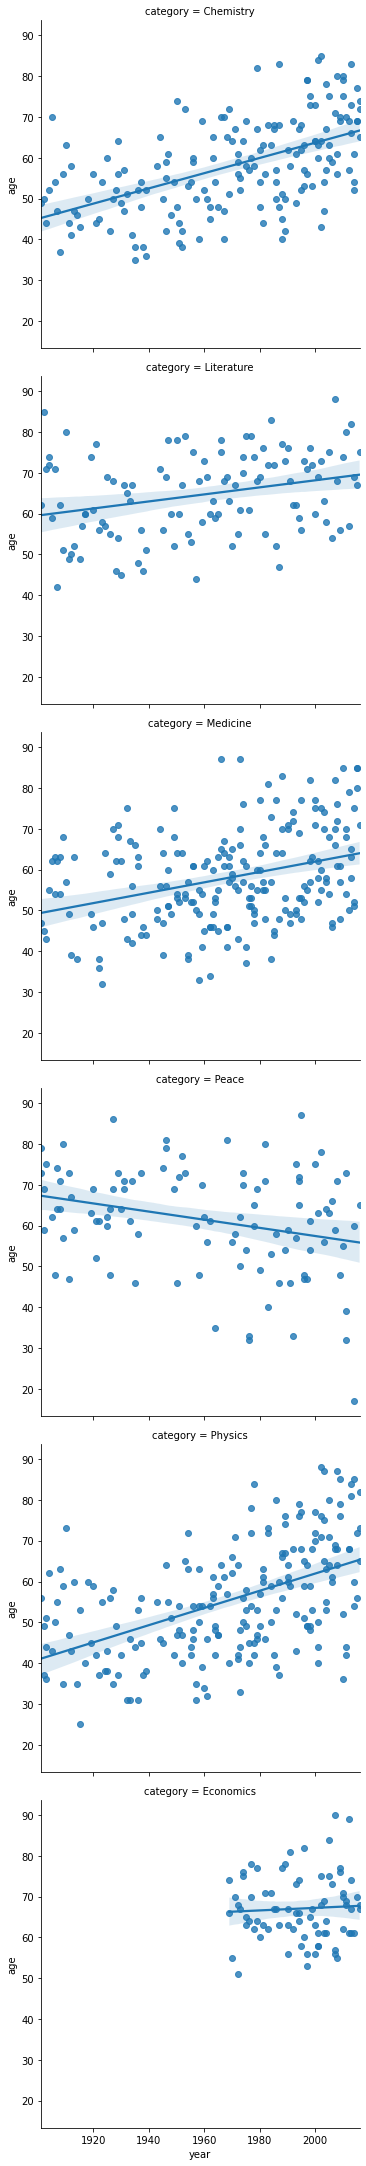

In [39]:
# Графики для каждого направления Нобелевской премии
sns.lmplot(data = nobel, x = 'year', y = 'age', row = 'category')


## 9. Самые старые и самые молодые лауреаты

Видно, что возраст лауреатов премии по химии, медицине и физике со временем растёт. Самая сильная тенденция наблюдается в физике: раньше средний возраст был ниже 50 лет, а сейчас почти 70. Литература и экономика более стабильны. Премия по экономике -  относительно новая. Но Премия мира показывает противоположную тенденцию, когда победители становятся моложе.  
Выясним, кто самые старые и самые молодые люди, когда-либо получавшие Нобелевскую премию.

In [38]:
display(nobel.nlargest(1, 'age'))
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,usa_winner,decade
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90.0,False,2000


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,usa_winner,decade
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,17.0,False,2010


Это Малала Юсуфзай, ставшая лауреатом Премии мира в возрасте 17 лет в 2014 году, и Леонид Гурвич, ставший лауреатом премии по экономике в возрасте 90 лет в 2007 году.